In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from imblearn.over_sampling import SMOTE





data1 = pd.read_csv("../data/preprocessed_dataset.csv")

# Step 1: Split the data
# Assuming the target column is named 'diabetes' (replace with the actual target column name)
X = data1.drop(columns=['diabetes'])  # Features
y = data1['diabetes']  # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 🧮 Check class distribution in y_train
print("Class balance in y_train:")
print(y_train.value_counts())


# Step 2: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print('Test precison = ', precision_score(y_test, y_pred_log_reg))
print('Test recall = ', recall_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

# Step 4: Train Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

print("\nDecision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))
print('Test precison = ', precision_score(y_test, y_pred_log_reg))
print('Test recall = ', recall_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_dtree))

# Step 5: Train K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune 'n_neighbors'
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("\nK-Nearest Neighbors Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print('Test precison = ', precision_score(y_test, y_pred_log_reg))
print('Test recall = ', recall_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_knn))

Class balance in y_train:
diabetes
0.0    63835
1.0     5932
Name: count, dtype: int64
Logistic Regression Results:
Accuracy: 0.960268887328183
Test precison =  0.8628816282806642
Test recall =  0.6335037357451828
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     27358
         1.0       0.86      0.63      0.73      2543

    accuracy                           0.96     29901
   macro avg       0.91      0.81      0.85     29901
weighted avg       0.96      0.96      0.96     29901


Decision Tree Results:
Accuracy: 0.9500685595799472
Test precison =  0.8628816282806642
Test recall =  0.6335037357451828
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     27358
         1.0       0.69      0.74      0.72      2543

    accuracy                           0.95     29901
   macro avg       0.83      0.85      0.84     29901
weighted avg       0.95      0.95      0.95     29901


K-Neares

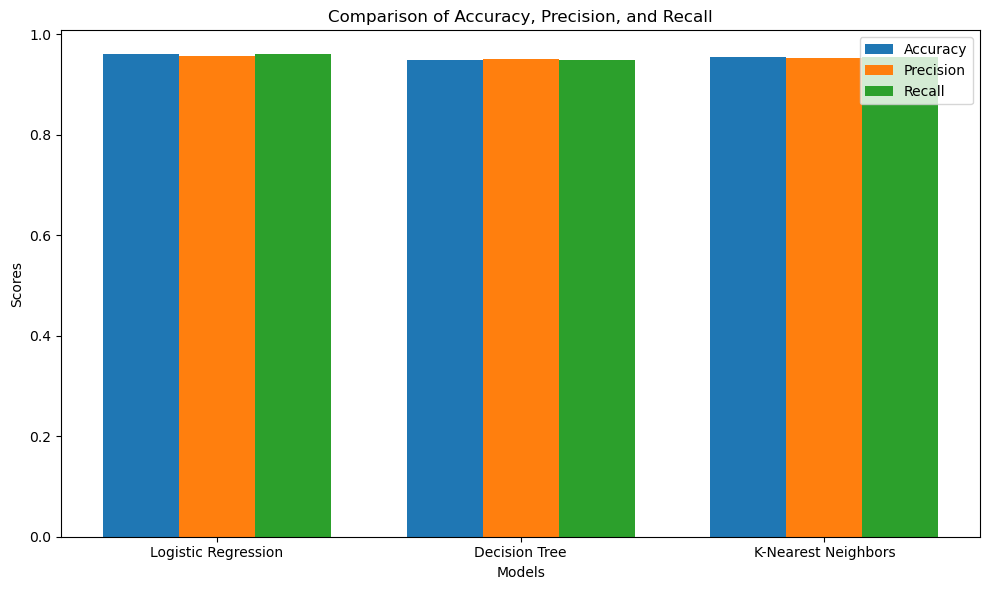

In [59]:
# Calculate accuracy, precision, and recall for each model
models = ["Logistic Regression", "Decision Tree", "K-Nearest Neighbors"]
accuracies = [
    accuracy_score(y_test, log_reg.predict(X_test_scaled)),
    accuracy_score(y_test, dtree.predict(X_test)),
    accuracy_score(y_test, knn.predict(X_test_scaled)),
]
precisions = [
    precision_score(y_test, log_reg.predict(X_test_scaled), average='weighted'),
    precision_score(y_test, dtree.predict(X_test), average='weighted'),
    precision_score(y_test, knn.predict(X_test_scaled), average='weighted'),
]
recalls = [
    recall_score(y_test, log_reg.predict(X_test_scaled), average='weighted'),
    recall_score(y_test, dtree.predict(X_test), average='weighted'),
    recall_score(y_test, knn.predict(X_test_scaled), average='weighted'),
]

# Bar chart
x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, accuracies, width, label='Accuracy')
ax.bar(x, precisions, width, label='Precision')
ax.bar(x + width, recalls, width, label='Recall')

# Labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Accuracy, Precision, and Recall')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show the chart
plt.tight_layout()
plt.show()


Logistic Regression Results:
Accuracy: 0.9603
Precision: 0.9579
Recall: 0.9603
F1-Score: 0.9575

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     27358
         1.0       0.86      0.63      0.73      2543

    accuracy                           0.96     29901
   macro avg       0.91      0.81      0.85     29901
weighted avg       0.96      0.96      0.96     29901



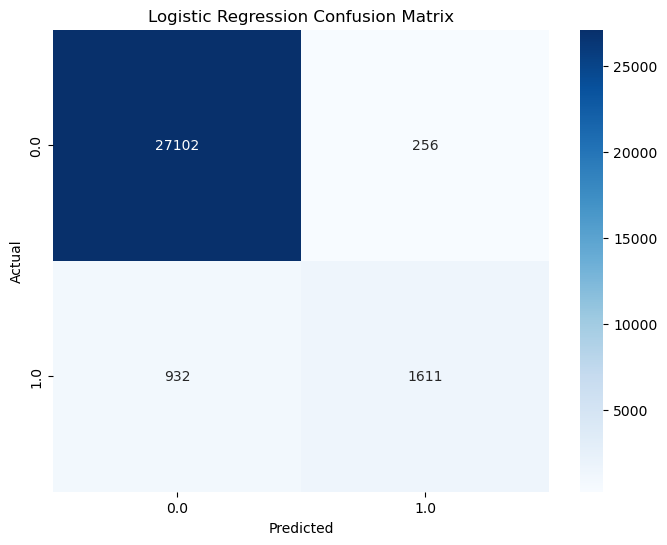


Decision Tree Results:
Accuracy: 0.9501
Precision: 0.9516
Recall: 0.9501
F1-Score: 0.9508

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97     27358
         1.0       0.69      0.74      0.72      2543

    accuracy                           0.95     29901
   macro avg       0.83      0.85      0.84     29901
weighted avg       0.95      0.95      0.95     29901



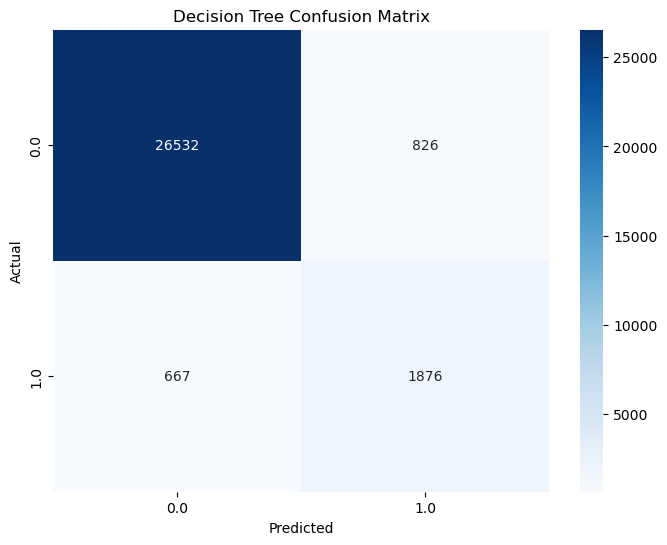


K-Nearest Neighbors Results:
Accuracy: 0.9551
Precision: 0.9527
Recall: 0.9551
F1-Score: 0.9501

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     27358
         1.0       0.89      0.54      0.67      2543

    accuracy                           0.96     29901
   macro avg       0.92      0.77      0.82     29901
weighted avg       0.95      0.96      0.95     29901



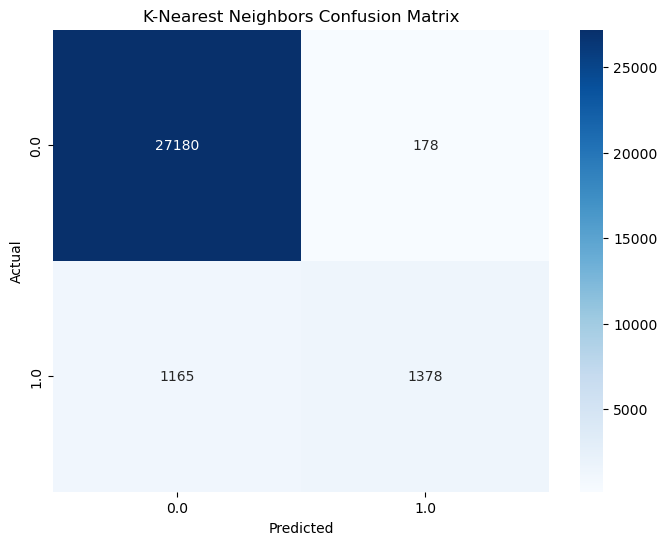

In [60]:


# Function to test and evaluate a model
def test_model(model, X_test, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print metrics
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Test Logistic Regression
test_model(log_reg, X_test_scaled, y_test, "Logistic Regression")

# Test Decision Tree
test_model(dtree, X_test, y_test, "Decision Tree")

# Test K-Nearest Neighbors
test_model(knn, X_test_scaled, y_test, "K-Nearest Neighbors")

In [ ]:


# Load the preprocessed dataset
data = pd.read_csv("../data/preprocessed_dataset.csv")

# Separate features and target
X = data.drop(columns=['diabetes'])  # Replace 'diabetes' with the target column name
y = data['diabetes']  # Target column

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE to generate synthetic diabetic samples
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Class balance after SMOTE:")
print(y_resampled.value_counts())

# Build Neural Network
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Compute class weights
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: weights[0], 1: weights[1]}
print("Class Weights:", class_weights)

# Add early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

history = model.fit(
    X_resampled, y_resampled,  # 👈 Use SMOTE data here!
    validation_data=(X_test_scaled, y_test),
    epochs=60,
    batch_size=32,
    callbacks=[early_stop]
)



# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

model.save("../model/diabetes_model_v3.h5")
print("Model saved as model/diabetes_model_v3.h5")

# Predict using actual test data from your pipeline
print("🧪 Testing model on a real test input from X_test_scaled")

sample_input_scaled = X_test_scaled[0].reshape(1, -1)  # Take first sample
prediction = model.predict(sample_input_scaled)

print(f"📊 Model prediction probability: {prediction[0][0]:.4f}")
print(f"🩺 Prediction: {'Diabetes' if prediction[0][0] >= 0.5 else 'No Diabetes'}")


✅ Class balance after SMOTE:
diabetes
1.0    63835
0.0    63835
Name: count, dtype: int64
Class Weights: {0: 0.5464635388109971, 1: 5.880563047875927}
Epoch 1/60


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3990/3990 ━━━━━━━━━━━━━━━━━━━━ 2s 453us/step - accuracy: 0.8737 - loss: 0.2732 - val_accuracy: 0.8984 - val_loss: 0.1821
Epoch 2/60
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 2s 463us/step - accuracy: 0.9077 - loss: 0.1997 - val_accuracy: 0.8941 - val_loss: 0.1860
Epoch 3/60
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 2s 472us/step - accuracy: 0.9118 - loss: 0.1892 - val_accuracy: 0.9051 - val_loss: 0.1732
Epoch 4/60
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 2s 454us/step - accuracy: 0.9156 - loss: 0.1808 - val_accuracy: 0.8977 - val_loss: 0.1817
Epoch 5/60
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 2s 445us/step - accuracy: 0.9182 - loss: 0.1760 - val_accuracy: 0.8993 - val_loss: 0.1883
Epoch 6/60
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 2s 452us/step - accuracy: 0.9192 - loss: 0.1740 - val_accuracy: 0.8980 - val_loss: 0.1828
Epoch 7/60
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 2s 450us/step - accuracy: 0.9211 - loss: 0.1712 - val_accuracy: 0.9084 - val_loss: 0.1702
Epoch 8/60
3990/3990 ━━━━━━━━━━━━━━━━━━━━ 2s 445us/step - accuracy: 0.9226 - loss: 0.16

Test Loss: 0.1622
Test Accuracy: 0.9150
✅ Model saved as model/diabetes_model_v3.h5
🧪 Testing model on a real test input from X_test_scaled
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
📊 Model prediction probability: 0.6103
🩺 Prediction: Diabetes


935/935 ━━━━━━━━━━━━━━━━━━━━ 0s 180us/step
Accuracy: 0.9150
Precision: 0.5000
Recall: 0.8785
F1-Score: 0.6373

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95     27358
         1.0       0.50      0.88      0.64      2543

    accuracy                           0.91     29901
   macro avg       0.74      0.90      0.79     29901
weighted avg       0.95      0.91      0.93     29901



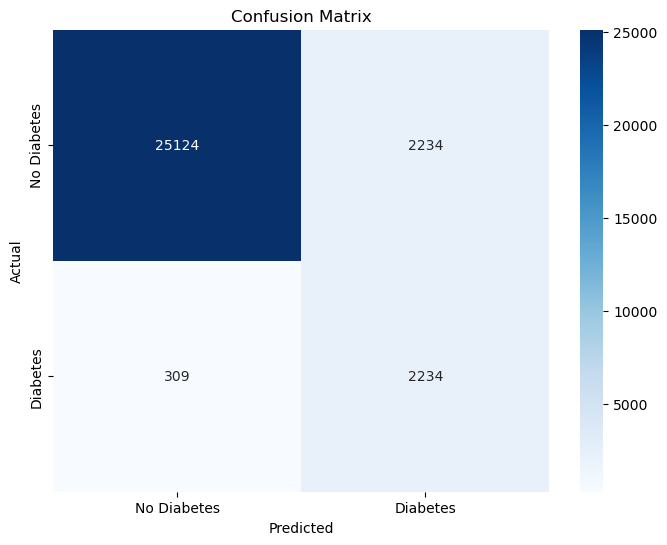

In [62]:


# Predict on the test set
y_pred_prob = model.predict(X_test_scaled)  # Get probabilities
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [1]:


# # Extract accuracy and loss from the training history
# train_accuracy = history.history['accuracy']
# val_accuracy = history.history['val_accuracy']
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']

# # Plot model accuracy
# plt.figure(figsize=(10, 5))
# plt.plot(train_accuracy, label='Training Accuracy')
# plt.plot(val_accuracy, label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)
# plt.show()

# # Plot model loss
# plt.figure(figsize=(10, 5))
# plt.plot(train_loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.show()

In [64]:
import joblib
joblib.dump(scaler, "../model/standard_scaler.pkl")


['../model/standard_scaler.pkl']

In [65]:
import joblib

le_gender = joblib.load("../model/le_gender.pkl")
le_location = joblib.load("../model/le_location.pkl")
le_smoking = joblib.load("../model/le_smoking.pkl")


In [ ]:
# Raw values from user_data
input_values = np.array([[
    64,     # age
    0, 0, 0, 0, 1,  # race one-hot (Other = 1)
    0,     # hypertension
    0,     # heart_disease
    49,    # BMI
    8,     # HbA1c
    139,   # Glucose
    le_gender.transform(["Female"])[0],
    le_location.transform(["Alabama"])[0],
    le_smoking.transform(["current"])[0],
    0  # target placeholder
]])

input_scaled = scaler.transform(input_values)
pred = model.predict(input_scaled)[0][0]
print("Prediction probability:", pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
📊 Prediction probability: 1.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
